<h1 style="color:#37c9e1; font-family:Ewert; font-size:200%;" class="font-effect-3d">OpenCV Cookbook</h1>
<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Style, Links and Libraries</h2>
#### [`Version in Google Colaboratory`](https://colab.research.google.com/drive/1GD7Oi1LtFaEi8VOjiBM5cj5ayWpaejaf) & [`SageMathCell Version`](lgabelitskaya.github.io/opencv_cookbook_SMC.html)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d');
span {font-family:'Roboto'; color:black; text-shadow:4px 4px 4px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:royalblue;}      
</style>

In [2]:
import warnings; warnings.filterwarnings('ignore')
import urllib,cv2,os,h5py
from skimage import io,transform,color,measure
import numpy as np,pylab as pl,pandas as pd
import seaborn as sb,scipy as sp
def get_image(original):
    img=cv2.imread(original)
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pl.style.use('seaborn-whitegrid')
print(os.listdir("../input"))

['traditional-decor-patterns', 'haarcascades', 'image-examples-for-mixed-styles']


<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Data</h2>

In [3]:
# load and display the data
fpath1='../input/traditional-decor-patterns/'
fpath2='../input/image-examples-for-mixed-styles/'
fpath3='../input/haarcascades/'
data=pd.read_csv(fpath1+"decor.csv")
img0=get_image(fpath2+"pattern01.png")
flower_img=get_image(fpath2+"flower.png")
cat_img=get_image(fpath2+"cat.png")
sport_img=get_image(fpath2+"sport.png")
# read the h5 file
f=h5py.File(fpath1+'DecorColorImages.h5','r')
# list all groups
keys=list(f.keys())
# data arrays
countries=np.array(f[keys[0]])
decors=np.array(f[keys[1]])
images=np.array(f[keys[2]])/255
types=np.array(f[keys[3]])

In [4]:
ColorFlags=[flag for flag in dir(cv2) if flag.startswith('COLOR')]
print (np.array(ColorFlags[:100]))

['COLORMAP_AUTUMN' 'COLORMAP_BONE' 'COLORMAP_COOL' 'COLORMAP_HOT'
 'COLORMAP_HSV' 'COLORMAP_JET' 'COLORMAP_OCEAN' 'COLORMAP_PARULA'
 'COLORMAP_PINK' 'COLORMAP_RAINBOW' 'COLORMAP_SPRING' 'COLORMAP_SUMMER'
 'COLORMAP_WINTER' 'COLOR_BAYER_BG2BGR' 'COLOR_BAYER_BG2BGRA'
 'COLOR_BAYER_BG2BGR_EA' 'COLOR_BAYER_BG2BGR_VNG' 'COLOR_BAYER_BG2GRAY'
 'COLOR_BAYER_BG2RGB' 'COLOR_BAYER_BG2RGBA' 'COLOR_BAYER_BG2RGB_EA'
 'COLOR_BAYER_BG2RGB_VNG' 'COLOR_BAYER_GB2BGR' 'COLOR_BAYER_GB2BGRA'
 'COLOR_BAYER_GB2BGR_EA' 'COLOR_BAYER_GB2BGR_VNG' 'COLOR_BAYER_GB2GRAY'
 'COLOR_BAYER_GB2RGB' 'COLOR_BAYER_GB2RGBA' 'COLOR_BAYER_GB2RGB_EA'
 'COLOR_BAYER_GB2RGB_VNG' 'COLOR_BAYER_GR2BGR' 'COLOR_BAYER_GR2BGRA'
 'COLOR_BAYER_GR2BGR_EA' 'COLOR_BAYER_GR2BGR_VNG' 'COLOR_BAYER_GR2GRAY'
 'COLOR_BAYER_GR2RGB' 'COLOR_BAYER_GR2RGBA' 'COLOR_BAYER_GR2RGB_EA'
 'COLOR_BAYER_GR2RGB_VNG' 'COLOR_BAYER_RG2BGR' 'COLOR_BAYER_RG2BGRA'
 'COLOR_BAYER_RG2BGR_EA' 'COLOR_BAYER_RG2BGR_VNG' 'COLOR_BAYER_RG2GRAY'
 'COLOR_BAYER_RG2RGB' 'COLOR_BAYER_

<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Basic Manipulations</h2>

Image parameters: size - 67500; shape - (150, 150, 3); type - uint8


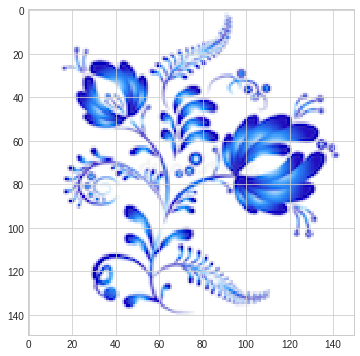

min 0.0 is at (63, 23), and max 255.0 is at (0, 0)
min 0.0 is at (30, 25), and max 255.0 is at (0, 0)
min 184.0 is at (96, 74), and max 255.0 is at (0, 0)


In [5]:
pl.rcParams['figure.figsize']=(6,6)
[fn,fn2,fn3]=[fpath1+'decor/'+el for el in 
              ['01_01_1_007.png','01_03_1_017.png','01_03_1_027.png']]
img=get_image(fn)
st='Image parameters: size - %s; shape - %s; type - %s'
print (st%(img.size,img.shape,img.dtype))
pl.imshow(img); pl.show()
for i in range(3):
    min_value,max_value,min_location,max_location=cv2.minMaxLoc(img[:,:,i])
    print ("min {} is at {}, and max {} is at {}"\
           .format(min_value,min_location,max_value,max_location))

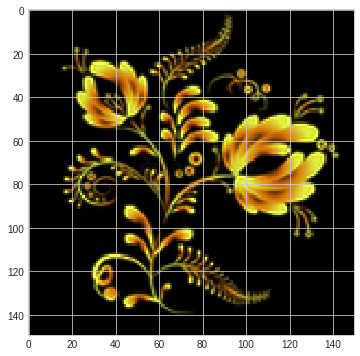

In [6]:
# invert colors
img_inv=cv2.bitwise_not(img)
pl.imshow(img_inv); pl.show()

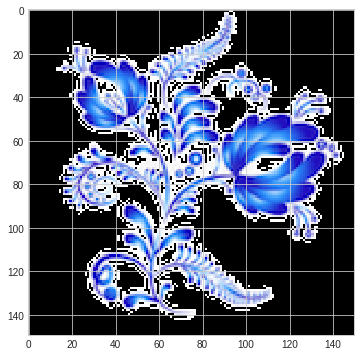

In [7]:
# change white to black
img_w2b=img.copy()
img_w2b[np.where((img_w2b==[255,255,255]).all(axis=2))]=[0,0,0]
pl.imshow(img_w2b); pl.show()

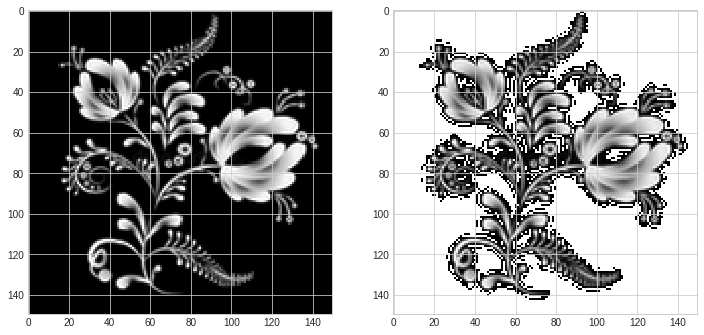

In [8]:
# gray scale
pl.rcParams['figure.figsize']=(12,6)
pl.figure(1); pl.subplot(121)
img_gray1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
pl.imshow(img_gray1)
pl.figure(1); pl.subplot(122)
img_gray2=cv2.cvtColor(img_w2b,cv2.COLOR_RGB2GRAY)
pl.imshow(img_gray2); pl.show()

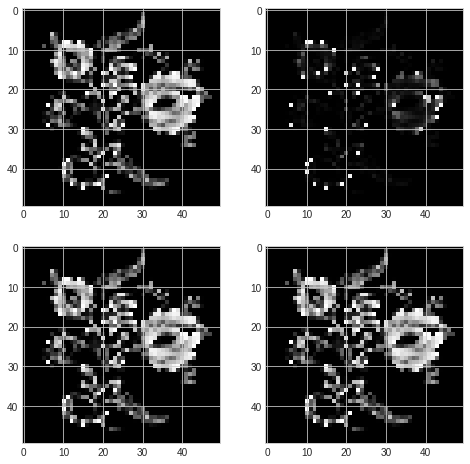

In [9]:
pl.rcParams['figure.figsize']=(8,8); N=50
# skimage & opencv - grayscale, resize, invert
img_skgray=io.imread(fn,as_grey=True)
img_skgray_resized=transform.resize(img_skgray,(N,N))
img_skgray_resized2=cv2.bitwise_not(img_skgray_resized)
img_cvgray_resized=cv2.resize(img_gray1,(N,N),interpolation=cv2.INTER_CUBIC)
img_cvgray_resized2=cv2.bitwise_not(img_cvgray_resized)
pl.figure(1); pl.subplot(221)
pl.imshow(img_skgray_resized,cmap=pl.cm.Greys)
pl.subplot(222)
pl.imshow(img_skgray_resized2)
pl.subplot(223)
pl.imshow(img_cvgray_resized,cmap=pl.cm.Greys)
pl.subplot(224)
pl.imshow(img_cvgray_resized); pl.show()

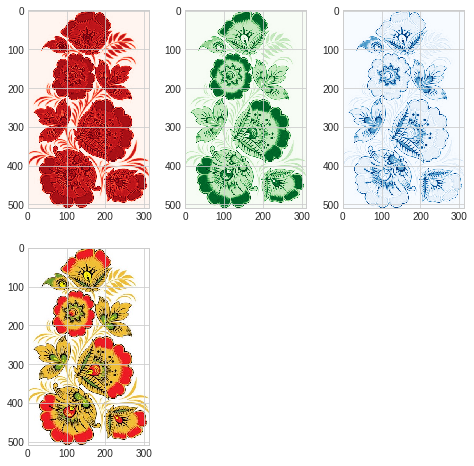

In [10]:
pl.rcParams['figure.figsize']=(8,8)
# split channels
b,g,r=cv2.split(img0)
# merge channels
img_merged=cv2.merge([b,g,r])
# display one of the channels
pl.figure(1); pl.subplot(231); pl.imshow(r,cmap=pl.cm.Reds_r)
pl.subplot(232); pl.imshow(g,cmap=pl.cm.Greens_r)
pl.subplot(233); pl.imshow(b,cmap=pl.cm.Blues_r)
# display merged image
pl.subplot(234); pl.imshow(img_merged); pl.show()

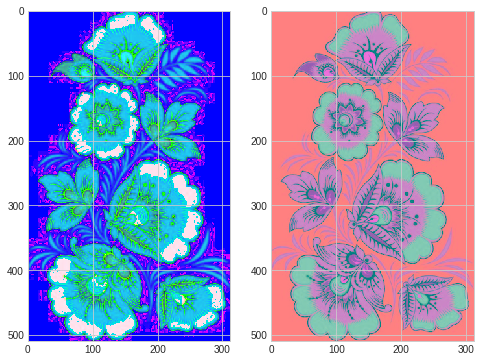

In [11]:
# display different ColorFlags
hsv_img=cv2.cvtColor(img0,cv2.COLOR_RGB2HSV_FULL)
lab_img=cv2.cvtColor(img0,cv2.COLOR_RGB2LAB)
pl.figure(1); pl.subplot(121); pl.imshow(hsv_img)
pl.subplot(122); pl.imshow(lab_img); pl.show()

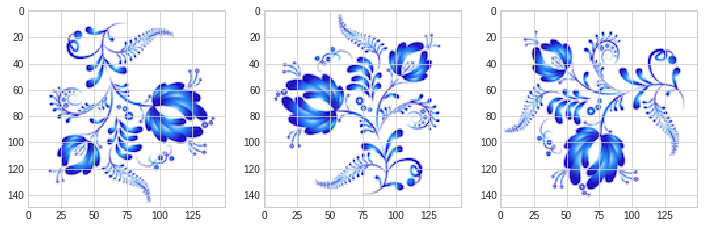

In [12]:
pl.rcParams['figure.figsize']=(12,4)
# flip images
img_vertical_flipped=cv2.flip(img,0)
img_horizontal_flipped=cv2.flip(img,1)
img_transposed=cv2.transpose(img)
pl.figure(1); pl.subplot(131); pl.imshow(img_vertical_flipped)
pl.subplot(132); pl.imshow(img_horizontal_flipped)
pl.subplot(133); pl.imshow(img_transposed); pl.show()

<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Advanced Manipulations</h2>

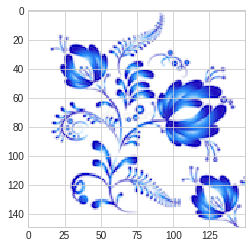

In [13]:
# repeat the fragment
img_twice=img.copy()
img_fragment=img_twice[15:60,15:60]
img_twice[105:105+img_fragment.shape[0],105:105+\
          img_fragment.shape[1]]=img_fragment
pl.imshow(img_twice); pl.show()

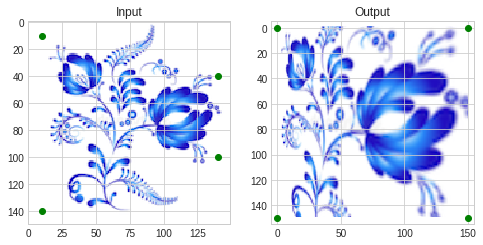

In [14]:
pl.rcParams['figure.figsize']=(8,4)
# perspective transformation
rows,cols,ch=img.shape
pts1=np.float32([[10,10],[140,40],[10,140],[140,100]])
pts2=np.float32([[0,0],[150,0],[0,150],[150,150]])
m=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(img,m,(150,150))
pl.subplot(121),pl.imshow(img),pl.title('Input')
pl.scatter(pts1[:,0],pts1[:,1],c='g')
pl.subplot(122),pl.imshow(dst),pl.title('Output')
pl.xlim(-5,155); pl.ylim(155,-5)
pl.scatter(pts2[:,0],pts2[:,1],c='g'); pl.show()

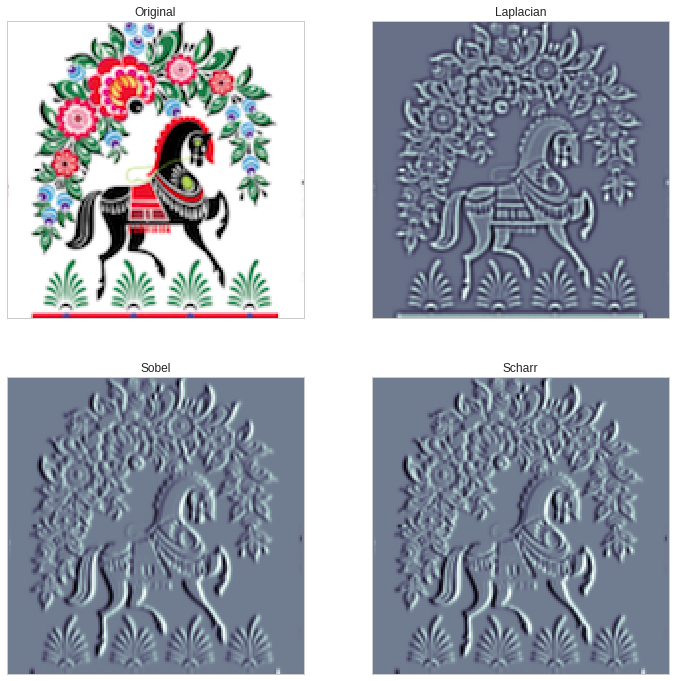

In [15]:
pl.rcParams['figure.figsize']=(12,12)
# gradient filters
img2=cv2.imread(fn2)
img2_gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)/255
laplacian=cv2.Laplacian(img2_gray,cv2.CV_64F,ksize=5)
sobel=cv2.Sobel(img2_gray,cv2.CV_64F,1,0,ksize=3)
scharr=cv2.Scharr(img2_gray,cv2.CV_64F,1,0)
pl.subplot(2,2,1),pl.imshow(img2)
pl.title('Original'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,2),pl.imshow(laplacian,cmap=pl.cm.bone)
pl.title('Laplacian'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,3),pl.imshow(sobel,cmap=pl.cm.bone)
pl.title('Sobel'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,4),pl.imshow(scharr,cmap=pl.cm.bone)
pl.title('Scharr'),pl.xticks([]),pl.yticks([]); pl.show()

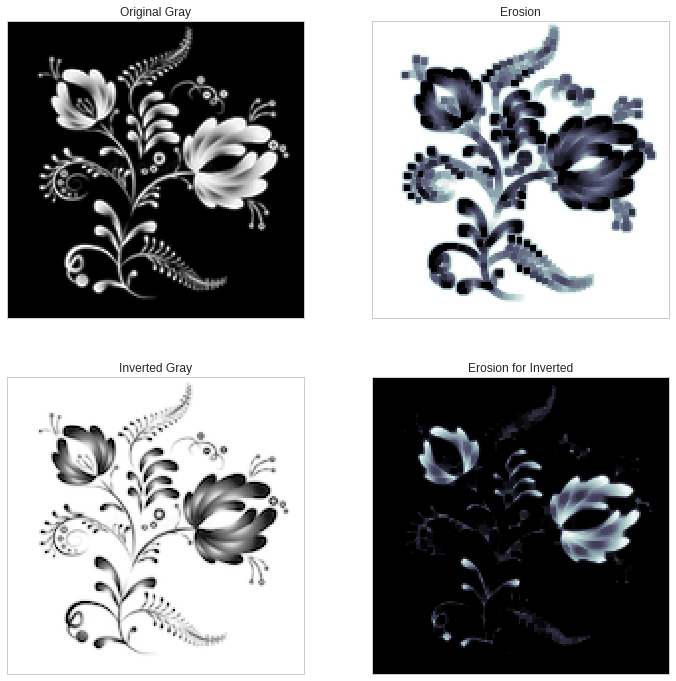

In [16]:
# erosion
kernel=np.ones((3,3),np.uint8)
erosion=cv2.erode(img_gray1,kernel,iterations=1)
pl.subplot(2,2,1),pl.imshow(img_gray1)
pl.title('Original Gray'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,2),pl.imshow(erosion,cmap=pl.cm.bone)
pl.title('Erosion'),pl.xticks([]),pl.yticks([])
img_gray1_inv=cv2.bitwise_not(img_gray1)
erosion_inv=cv2.erode(img_gray1_inv,kernel,iterations=1)
pl.subplot(2,2,3),pl.imshow(img_gray1_inv)
pl.title('Inverted Gray'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,4),pl.imshow(erosion_inv,cmap=pl.cm.bone)
pl.title('Erosion for Inverted')
pl.xticks([]),pl.yticks([]); pl.show()

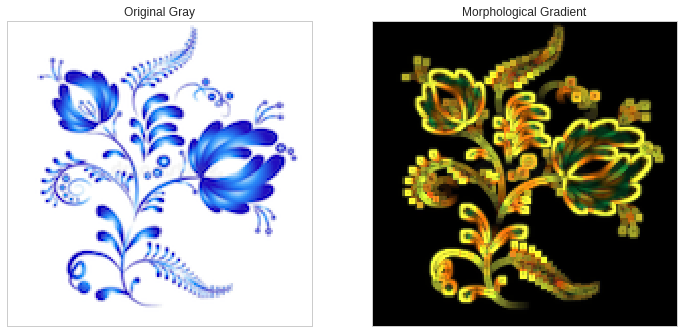

In [17]:
# morphological gradient
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
pl.subplot(1,2,1),pl.imshow(img)
pl.title('Original Gray'),pl.xticks([]),pl.yticks([])
pl.subplot(1,2,2),pl.imshow(gradient,cmap=pl.cm.bone)
pl.title('Morphological Gradient')
pl.xticks([]),pl.yticks([]); pl.show()

<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Edges' & Contours' Detection</h2>

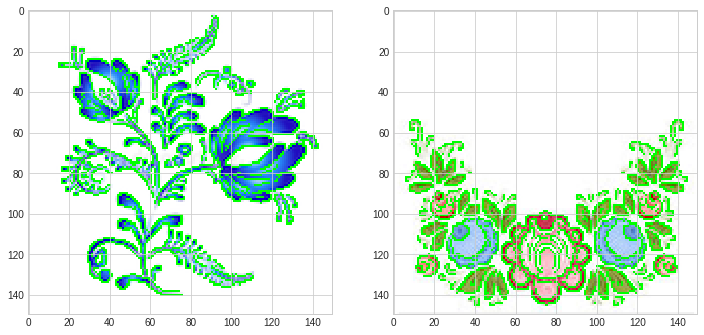

In [18]:
pl.rcParams['figure.figsize']=(12,6)
img3=cv2.imread(fn3)
img3_gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
edge_img=img.copy(); edge_img3=img3.copy()
edge=cv2.Canny(img_gray1,90,240)
edge_img[edge!=0]=(0,255,0) 
edge3=cv2.Canny(img3_gray,90,240)
edge_img3[edge3!=0]=(0,255,0) 
pl.figure(1); pl.subplot(121); pl.imshow(edge_img)
pl.subplot(122); pl.imshow(edge_img3); pl.show()

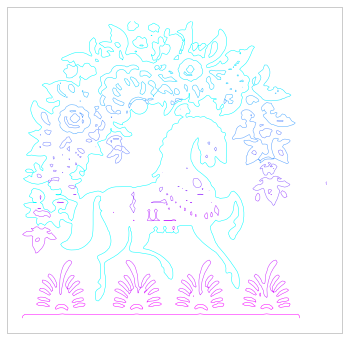

In [19]:
img=io.imread(fn2); level=.68
gray_img=color.colorconv.rgb2grey(img) 
contours=measure.find_contours(gray_img,level)
n=len(contours); pl.figure(figsize=(6,6))
pl.gca().invert_yaxis()
[pl.plot(contours[i][:,1],contours[i][:,0],lw=.5,
         color=pl.get_cmap('cool')(i/n)) 
 for i in range(n)]
pl.xticks([]); pl.yticks([]); pl.show()

<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Key Points</h2>

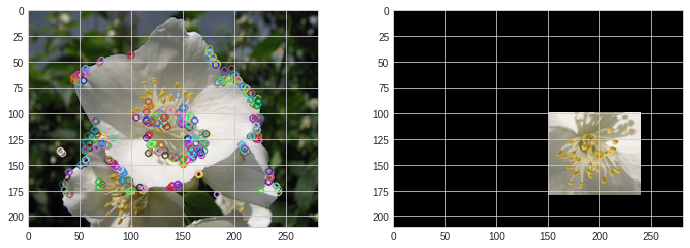

In [20]:
pl.rcParams['figure.figsize']=(12,4)
orb_img=flower_img.copy()
orb=cv2.ORB_create()
keypoints=orb.detect(orb_img,None)
keypoints,descriptors=orb.compute(orb_img,keypoints)
cv2.drawKeypoints(orb_img,keypoints,orb_img)
match_img=np.zeros(flower_img.shape,np.uint8)
center_img=flower_img[60:140,90:180] 
match_img[60:140,100:180]=[0,0,0] 
center_img=cv2.flip(center_img,0)
match_img[100:100+center_img.shape[0],
          150:150+center_img.shape[1]]=center_img
pl.figure(1); pl.subplot(121); pl.imshow(orb_img)
pl.subplot(122); pl.imshow(match_img); pl.show()

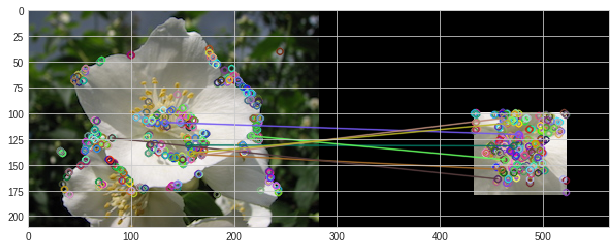

In [21]:
match_keypoints=orb.detect(match_img,None)
match_keypoints,match_descriptors=\
orb.compute(match_img,match_keypoints)
brute_force=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=brute_force.match(descriptors,match_descriptors)
matches=sorted(matches,key=lambda x:x.distance) 
draw_matches=cv2.drawMatches(orb_img,keypoints,
                             match_img,match_keypoints, 
                             matches[:7],orb_img)
pl.imshow(draw_matches); pl.show()

<h2 style="color:#37c9e1; font-family:Ewert; font-size:150%;" class="font-effect-3d">Objects' Detection</h2>

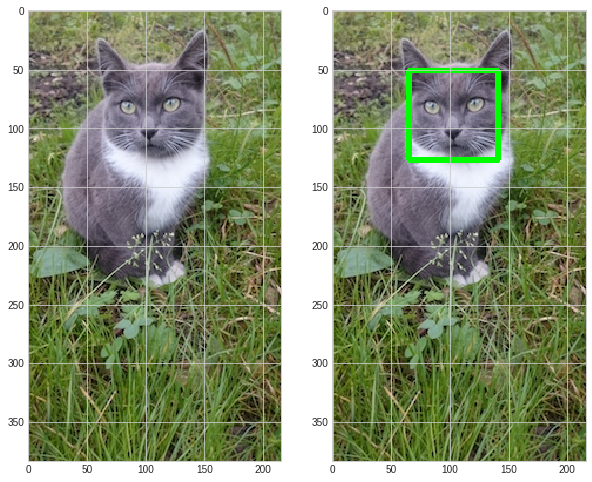

In [22]:
pl.rcParams['figure.figsize']=(10,10)
url='haarcascade_frontalcatface.xml'
gray_cat_img=cv2.cvtColor(cat_img,cv2.COLOR_RGB2GRAY)
catface_img=cat_img.copy()
catface_cascade=cv2.CascadeClassifier(fpath3+url)
catfaces=catface_cascade.detectMultiScale(gray_cat_img,1.095,6)
for (x,y,w,h) in catfaces:
    cv2.rectangle(catface_img,(x,y),(x+w,y+h),(0,255,0),3)
pl.figure(1); pl.subplot(121); pl.imshow(cat_img)
pl.subplot(122); pl.imshow(catface_img); pl.show() 

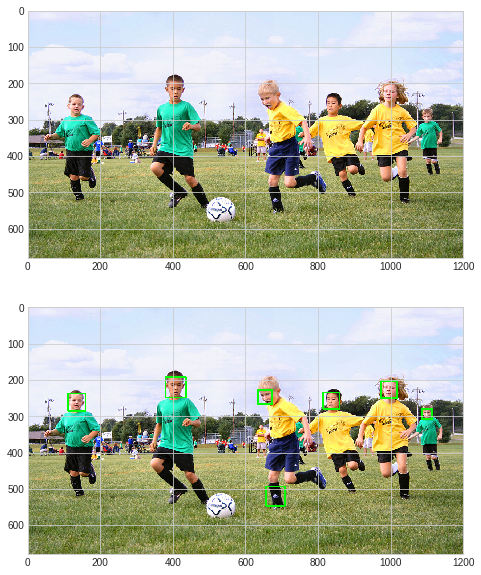

In [23]:
gray_sport_img=cv2.cvtColor(sport_img,cv2.COLOR_RGB2GRAY)
face_img=sport_img.copy()
url2='haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(fpath3+url2)
faces=face_cascade.detectMultiScale(gray_sport_img,1.095,4)
for (x,y,w,h) in faces:
     cv2.rectangle(face_img,(x,y),(x+w,y+h),
     (int(0),int(255),int(0)),int(3))
fig=pl.figure(figsize=(10,10))  
ax=fig.add_subplot(211); ax.imshow(sport_img)
ax=fig.add_subplot(212); ax.imshow(face_img); pl.show()